## DATA PRE-PROCESSING 

### Objective :
* Data Loading
* Data Understanding
* Data Cleaning

DATA SET : BigMart Sales Data

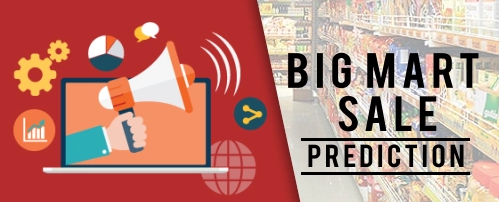

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
|ItemWeight              |Weight of product                                                                                   |
|ItemFatContent          |Whether the product is low fat or not                                                               |
|ItemVisibility          |The % of the total display area of all products in a store allocated to the particular product      |
|ItemType                |The category to which the product belongs                                                           |
|ItemMRP                 |Maximum Retail Price (list price) of the product                                                    |
|OutletIdentifier        |Unique store ID                                                                                     |
|OutletEstablishmentYear |The year in which the store was established                                                         |
|OutletSize              |The size of the store in terms of ground area covered                                               |
|OutletLocationType      |The type of city in which the store is located                                                      |
|OutletType              |Whether the outlet is just a grocery store or some sort of supermarket                              |
|ItemOutletSales         |sales of the product in t particular store. This is the outcome variable to be predicted.           |

Importing required Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
df=pd.read_csv('Bigmrttrain.csv')
fnltest=pd.read_csv('Bigmrttest.csv')

In [4]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

Viewing the Data :

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
fnltest.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Shape of the Train data :

In [7]:
print('Shape of the Train data :',df.shape)
print('No of Rows    :',df.shape[0])
print('No of columns :',df.shape[1])

Shape of the Train data : (8523, 12)
No of Rows    : 8523
No of columns : 12


Shape of the Given Test Data :

In [8]:
print('Shape of the Test data :',fnltest.shape)
print('No of Rows    :',fnltest.shape[0])
print('No of columns :',fnltest.shape[1])

Shape of the Test data : (5681, 11)
No of Rows    : 5681
No of columns : 11


Viewing the Data Types :

In [9]:
print ("Train Data set dtypes :\n")
print(df.dtypes)
print('--------------------------')
print("Test Data set dtypes :\n ")
print(fnltest.dtypes)

Train Data set dtypes :

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object
--------------------------
Test Data set dtypes :
 
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object


Now consider the given train data :

Viewing the info :

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Univariate Analysis :

Viewing the columns :

In [12]:
for i in df.columns :
    print(i)

Item_Identifier
Item_Weight
Item_Fat_Content
Item_Visibility
Item_Type
Item_MRP
Outlet_Identifier
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Outlet_Type
Item_Outlet_Sales


Consider the Object columns:

In [13]:
objcols=df.select_dtypes('object')
objcols.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [14]:
for i in objcols.columns :
    print(i,'has',objcols[i].nunique(),'levels \n','Values:',objcols[i].unique())
    print('---------------------------------------------------\n')

Item_Identifier has 1559 levels 
 Values: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
---------------------------------------------------

Item_Fat_Content has 5 levels 
 Values: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
---------------------------------------------------

Item_Type has 16 levels 
 Values: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
---------------------------------------------------

Outlet_Identifier has 10 levels 
 Values: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
---------------------------------------------------

Outlet_Size has 3 levels 
 Values: ['Medium' nan 'High' 'Small']
---------------------------------------------------

Outlet_Location_Type has 3 levels 
 Values: ['Tier 1' 'Tier 3' 'Tier 2']
-----------------------------------

In [15]:
# Item_Fat :
df.Item_Fat_Content.value_counts(dropna=False)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

As we can observe that LF,low fat, Low Fat and Regular,reg  levels are duplicated 

In [16]:
df.Item_Fat_Content.replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

similarly we will replace the Item_fat_content values in the Test data :

In [17]:
fnltest.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [18]:
fnltest.Item_Fat_Content.replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
fnltest.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [19]:
# Item_Type :
df.Item_Type.value_counts(dropna=False)

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Looking at the Value counts for the object columns :

In [20]:
for i in objcols.columns[objcols.columns !='Item_Identifier'] :
    print('column Name :',i,'\n',df[i].value_counts(dropna=False),'\n-----------------------------------------')

column Name : Item_Fat_Content 
 Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64 
-----------------------------------------
column Name : Item_Type 
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 
-----------------------------------------
column Name : Outlet_Identifier 
 OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64 
-----------------------------------------
column Name : Outlet_

As we can observe from the above there are no duplicate levels for all the object columns , but for 'Item_Identifier' there are 1559 levels and if we observe that the first two strings will form the less no of levels.

So we will extract the first two letters from that column :

In [21]:
# we extract the first two letters from the column and give it to the new column 'ID' :
df['ID']=df.Item_Identifier.apply(lambda x : x[:2] )
df.ID.value_counts(dropna=False)

FD    6125
NC    1599
DR     799
Name: ID, dtype: int64

Similarly we will do for the Test set :

In [22]:
fnltest['ID']=fnltest.Item_Identifier.apply(lambda x :x[:2])
fnltest.ID.value_counts(dropna=False)

FD    4076
NC    1087
DR     518
Name: ID, dtype: int64

Consider the Numeric cols :

In [23]:
numcols=df.select_dtypes(np.number)
numcols.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [24]:
numcols.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


checking the Null Values :

In [25]:
numcols.isnull().sum()/numcols.shape[0]

Item_Weight                  0.171653
Item_Visibility              0.000000
Item_MRP                     0.000000
Outlet_Establishment_Year    0.000000
Item_Outlet_Sales            0.000000
dtype: float64

As we can observe that there are 17% missing values in the 'Item_Weight' column ,we can impute them with mean or median but not now after doing Bivariate analysis we can decide whether to impute or there is a pattern in the Missing Values 

Look at for the outliers :

one of the ways to easily Identify the outliers is to draw Box-plots :

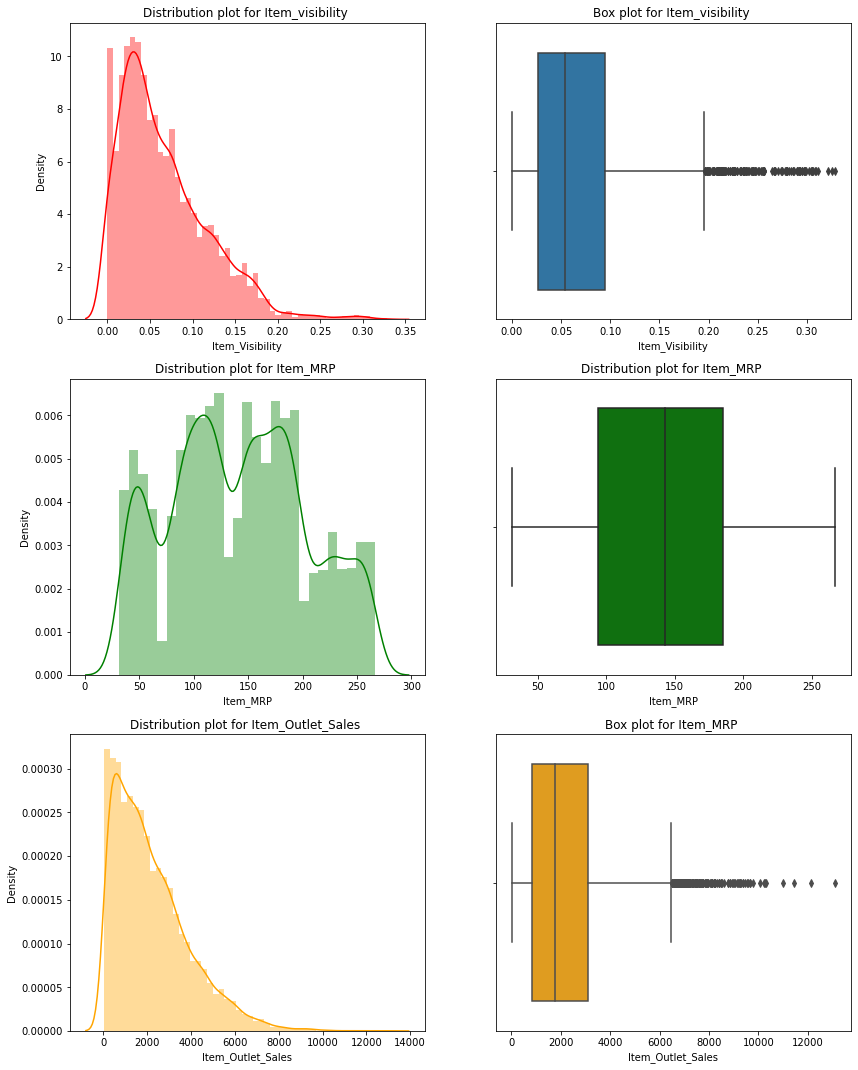

In [26]:
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
sns.distplot(df.Item_Visibility,kde=True,color='r')
plt.title('Distribution plot for Item_visibility ')

plt.subplot(3,2,2)
sns.boxplot(df.Item_Visibility)
plt.title('Box plot for Item_visibility ')

plt.subplot(3,2,3)
sns.distplot(df.Item_MRP,kde=True,color='g')
plt.title('Distribution plot for Item_MRP ')

plt.subplot(3,2,4)
sns.boxplot(df.Item_MRP,color='g')
plt.title('Distribution plot for Item_MRP ')

plt.subplot(3,2,5)
sns.distplot(df.Item_Outlet_Sales,kde=True,color='orange')
plt.title('Distribution plot for Item_Outlet_Sales ')

plt.subplot(3,2,6)
sns.boxplot(df.Item_Outlet_Sales,color='orange')
plt.title('Box plot for Item_MRP ')

plt.subplots_adjust(top=2,bottom=1)
plt.show()

As we can observe that,The Item_Visibility distribution is right skewed i.e., most of the observations lie towards the left end. 
from the box plot 50% of the data points lie in the range of (0.00,0.05) and also outliers are present.

For the Item_MRP there are no outliers but the distribution looks like it is a bimodal distribution , the reason may be due to the segmentation of Food Items.

For the Item_outlet_sales which is our Target column is also right skewed and also outliers are present.
we can treat the outliers seperately i.e., we will try to find out the reasons why these are present due to high significant factors or some  typo mistakes 

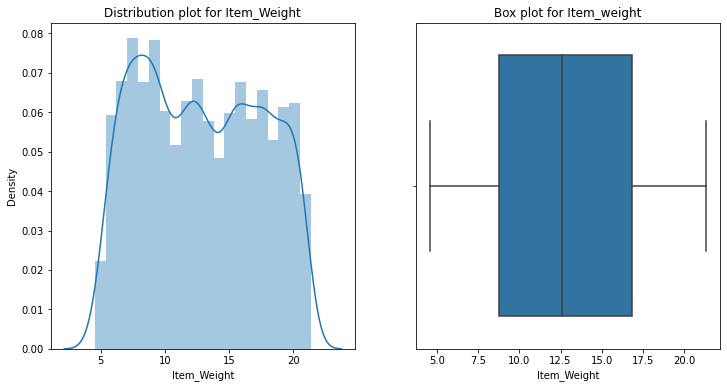

In [27]:
# For Item_Weight : we will extract those values which are not null and see the distribution.

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df[~df.Item_Weight.isnull()]['Item_Weight'],kde=True)
plt.title('Distribution plot for Item_Weight')

plt.subplot(1,2,2)
sns.boxplot(df[~df.Item_Weight.isnull()]['Item_Weight'])
plt.title('Box plot for Item_weight')

plt.show()


For the non null values of the Item_weights we can observe that there are no outliers by looking at the Box plot

Outlet_Establishment_Year : Although it is read as Numeric column we will treat this column by extracting the no of years from the established year

First we will look at the plot for the establishment_year :

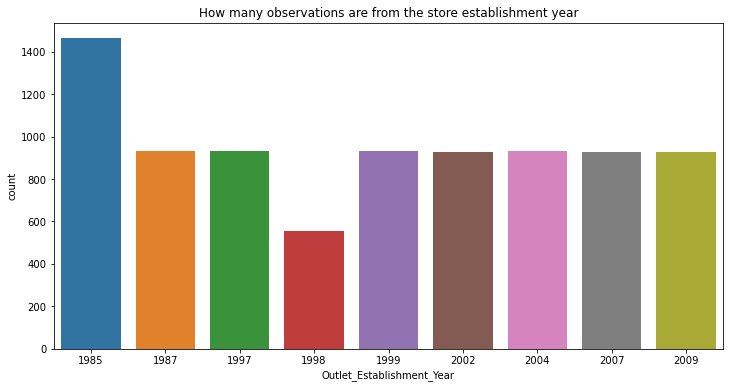

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Outlet_Establishment_Year')
plt.title('How many observations are from the store establishment year')
plt.show()

Now we will convert the Establishment year column  in to the  No of years from the establishment year to the data presented year. so we will subtract it from the year 2017.

In [29]:
df['Outlet_age']=2017-df.Outlet_Establishment_Year
# Test data :
fnltest['Outlet_age']=2017-fnltest.Outlet_Establishment_Year
print(df['Outlet_age'].head())
print('----------')
print(fnltest['Outlet_age'].head())

0    18
1     8
2    18
3    19
4    30
Name: Outlet_age, dtype: int64
----------
0    18
1    10
2    19
3    10
4    32
Name: Outlet_age, dtype: int64


Bivariate Analysis :

checking the Null values for the Train data set :

In [30]:
df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
ID                              0
Outlet_age                      0
dtype: int64

In [31]:
l=['ID','Item_Identifier','Item_Fat_Content','Item_Type','Item_MRP','Item_Weight']
df[df.Item_Weight.isnull()][l].head(15)

,ID,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Item_Weight
7,FD,FDP10,Low Fat,Snack Foods,107.7622,NaN
18,DR,DRI11,Low Fat,Hard Drinks,113.2834,NaN
21,FD,FDW12,Regular,Baking Goods,144.5444,NaN
23,FD,FDC37,Low Fat,Baking Goods,107.6938,NaN
29,FD,FDC14,Regular,Canned,43.6454,NaN
36,FD,FDV20,Regular,Fruits and Vegetables,128.0678,NaN
38,FD,FDX10,Regular,Snack Foods,36.9874,NaN
39,FD,FDB34,Low Fat,Snack Foods,87.6198,NaN
49,FD,FDS02,Regular,Dairy,196.8794,NaN
59,FD,FDI26,Low Fat,Canned,180.0344,NaN


Here we need see the entire Data set once.

As we can observe that there are Item_weight missing values for all the Item_types , so it is better to impute them with the mean/median values of the Item-Type and Item_weights.

In [32]:
l=['Item_Type','Item_Weight']
wght=df[~(df.Item_Weight.isnull())][l]
wght.head()

,Item_Type,Item_Weight
0,Dairy,9.30
1,Soft Drinks,5.92
2,Meat,17.50
3,Fruits and Vegetables,19.20
4,Household,8.93


In [33]:
# we can verify the null values count by subtracting the wght data frame rows from the df data frame 
df.shape[0]-wght.shape[0]

1463

In [34]:
wght.Item_Type.value_counts()

Fruits and Vegetables    1019
Snack Foods               988
Household                 759
Frozen Foods              718
Dairy                     566
Canned                    539
Baking Goods              536
Health and Hygiene        430
Soft Drinks               374
Meat                      337
Breads                    204
Hard Drinks               183
Others                    137
Starchy Foods             130
Breakfast                  89
Seafood                    51
Name: Item_Type, dtype: int64

In [35]:
print('Mean Values of Item_Weight\n',wght.Item_Weight.groupby(wght.Item_Type).mean())
print('-------------------------------------------')
print('Median Values of Item_Weight\n',wght.Item_Weight.groupby(wght.Item_Type).median())

Mean Values of Item_Weight
 Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64
-------------------------------------------
Median Values of Item_Weight
 Item_Type
Baking Goods             11.650
Breads                   10.600
Breakfast                10.695
Canned                   12.150
Dairy                    13.350
Frozen Foods             12.850
Fruits and Vegetables    13.100
Hard Drinks              10.100
Health and Hygiene       12.

As we can observe that the Mean and the Median values are not that much significantly different.

so we can Impute them with the Median values.

In [36]:
wght.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Breads',
       'Canned', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [37]:
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Dairy'),'Item_Weight']=13.35
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Soft Drinks'),'Item_Weight']=11.80
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Meat'),'Item_Weight']=12.35
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Fruits and Vegetables'),'Item_Weight']=13.10
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Household'),'Item_Weight']=13.15
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Baking Goods'),'Item_Weight']=11.65
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Snack Foods'),'Item_Weight']=13.15
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Frozen Foods'),'Item_Weight']=12.85
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Breakfast'),'Item_Weight']=10.69
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Health and Hygiene'),'Item_Weight']=12.15
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Hard Drinks'),'Item_Weight']=10.10
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Breads'),'Item_Weight']=10.60
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Canned'),'Item_Weight']=12.15
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Starchy Foods'),'Item_Weight']=13.17
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Others'),'Item_Weight']=14.5
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Seafood'),'Item_Weight']=11.65

In [38]:
df.Item_Weight.isnull().sum()

0

Similarly we will do it for the Test Data :

First we will check the Null values for the Test set :

In [39]:
fnltest.isnull().sum().sort_values(ascending=False)

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
ID                              0
Outlet_age                      0
dtype: int64

In [40]:
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Dairy'),'Item_Weight']=13.35
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Soft Drinks'),'Item_Weight']=11.80
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Meat'),'Item_Weight']=12.35
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Fruits and Vegetables'),'Item_Weight']=13.10
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Household'),'Item_Weight']=13.15
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Baking Goods'),'Item_Weight']=11.65
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Snack Foods'),'Item_Weight']=13.15
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Frozen Foods'),'Item_Weight']=12.85
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Breakfast'),'Item_Weight']=10.69
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Health and Hygiene'),'Item_Weight']=12.15
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Hard Drinks'),'Item_Weight']=10.10
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Breads'),'Item_Weight']=10.60
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Canned'),'Item_Weight']=12.15
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Starchy Foods'),'Item_Weight']=13.17
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Others'),'Item_Weight']=14.5
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Seafood'),'Item_Weight']=11.65

In [41]:
fnltest.Item_Weight.isnull().sum()

0

In [42]:
# Now consider the Outlet_size column :
df.Outlet_Size.value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [43]:
# Calculating the percentage of Missing Values for the Outlet_Size column :
print('% of outlet_size missing values :',df.Outlet_Size.isnull().sum()/df.shape[0] * 100)

% of outlet_size missing values : 28.27642848762173


First we will fill these Null values with the Missing :

In [44]:
df.Outlet_Size.fillna('Missing',inplace=True)

In [45]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'ID', 'Outlet_age'],
      dtype='object')

In [46]:
l=['Outlet_Establishment_Year', 'Outlet_Location_Type','Outlet_Type','Outlet_age','Outlet_Size']
outlet=df[df.Outlet_Size=='Missing'][l]
outlet.head(15)

,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_age,Outlet_Size
3,1998,Tier 3,Grocery Store,19,Missing
8,2002,Tier 2,Supermarket Type1,15,Missing
9,2007,Tier 2,Supermarket Type1,10,Missing
25,2007,Tier 2,Supermarket Type1,10,Missing
28,1998,Tier 3,Grocery Store,19,Missing
30,1998,Tier 3,Grocery Store,19,Missing
33,2002,Tier 2,Supermarket Type1,15,Missing
45,1998,Tier 3,Grocery Store,19,Missing
46,2002,Tier 2,Supermarket Type1,15,Missing
47,2002,Tier 2,Supermarket Type1,15,Missing


In [47]:
print('Outlet-Age values :',outlet.Outlet_age.unique())
print('Outlet-Location values :',outlet.Outlet_Location_Type.unique())
print('Outlet-Type values :',outlet.Outlet_Type.unique())

Outlet-Age values : [19 15 10]
Outlet-Location values : ['Tier 3' 'Tier 2']
Outlet-Type values : ['Grocery Store' 'Supermarket Type1']


In [48]:
df[(df.Outlet_Location_Type=='Tier 2') & (df.Outlet_Type=='Supermarket Type1')]['Outlet_Size'].value_counts()

Missing    1855
Small       930
Name: Outlet_Size, dtype: int64

In [49]:
outlet[(outlet.Outlet_Location_Type=='Tier 2') & (outlet.Outlet_Type=='Supermarket Type1')]['Outlet_Size'].value_counts()

Missing    1855
Name: Outlet_Size, dtype: int64

In [50]:
df[(df.Outlet_Location_Type=='Tier 3') & (df.Outlet_Type=='Grocery Store')]['Outlet_Size'].value_counts()

Missing    555
Name: Outlet_Size, dtype: int64

In [51]:
df[(df.Outlet_Location_Type=='Tier 3')]['Outlet_Size'].value_counts()

Medium     1863
High        932
Missing     555
Name: Outlet_Size, dtype: int64

In [52]:
df[(df.Outlet_Type=='Grocery Store')]['Outlet_Size'].value_counts()

Missing    555
Small      528
Name: Outlet_Size, dtype: int64

In [53]:
outlet[(outlet.Outlet_Location_Type=='Tier 3') & (outlet.Outlet_Type=='Grocery Store')]['Outlet_Size'].value_counts()

Missing    555
Name: Outlet_Size, dtype: int64

We can replace the Missing values of the Outlet_Size with the Values  :

  If the outlet's loaction type is 'Tier 2' we replace with the 'Small'
  
  If the outlet's location type is 'Tier 3' we replace with the 'Small' i.e., we can fill the null values by Small.

In [54]:
df.Outlet_Size.replace('Missing','Small',inplace=True)
df.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

Similarly we can do it for the Test set :

In [55]:
# checking the null values for the Test set :
fnltest[fnltest.Outlet_Size.isnull()][l].head(15)

,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_age,Outlet_Size
1,2007,Tier 2,Supermarket Type1,10,NaN
2,1998,Tier 3,Grocery Store,19,NaN
3,2007,Tier 2,Supermarket Type1,10,NaN
8,2002,Tier 2,Supermarket Type1,15,NaN
9,2007,Tier 2,Supermarket Type1,10,NaN
10,2007,Tier 2,Supermarket Type1,10,NaN
11,2002,Tier 2,Supermarket Type1,15,NaN
16,2002,Tier 2,Supermarket Type1,15,NaN
19,1998,Tier 3,Grocery Store,19,NaN
25,1998,Tier 3,Grocery Store,19,NaN


In [56]:
fnltest.Outlet_Size.fillna('Small',inplace=True)

so the Missing value Treatment is done

In [57]:
# checking the Null values for both the Train and Test data sets :
print('Train\n',df.isnull().sum())
print('-----------------------------')
print('Test\n',fnltest.isnull().sum())

Train
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
ID                           0
Outlet_age                   0
dtype: int64
-----------------------------
Test
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
ID                           0
Outlet_age                   0
dtype: int64


In [58]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ID,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,18
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,8
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,18
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,19
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,30


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  ID                         8523 non-null   object 
 13  Outlet_age                 8523 non-null   int64

Now the Data is not having any missing values and all the duplicate levels are removed.

### Conclusion :
*    Data Cleaning  : 
      * we removed the Duplicate Levels in the columns
      * we created the New columns based on the existing required columns
*    Missing Value Treatment :
      * We Imputed the Missing values with the values using Univariate and Bi-variate analysis.

#### --------------------------------------------------------------------------------------------------------------------------------